In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# 针对默认的中文不支持乱码的情况 需要进行下列配置
# 针对windows
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [15]:
# !pip install -U numpy

In [16]:
# !pip install -U pandas

# 数据处理和分析

## 经济和能源

In [17]:
df1 = pd.read_excel(r"G:\碳排放.xlsx", sheet_name=0, header=0)
df1

,主题,项目,子项,单位,细分项,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,人口,常驻人口,总量,万人,-,7869.340000,8022.990000,8119.810000,8192.440000,8281.090000,8315.110000,8381.470000,8423.500000,8446.190000,8469.090000,8477.260000
1,生产总值,GDP,总量,亿元,-,41383.870000,45952.650000,50660.200000,55580.110000,60359.430000,65552.000000,70665.706829,75752.201492,80827.711935,85556.133874,88683.214629
2,NaN,第一产业,农林消费部门,亿元,-,2409.240000,2736.861413,3057.823361,3228.538808,3358.613217,3636.080723,3690.609595,3568.541188,3591.607577,3726.607453,3916.811805
3,NaN,第二产业,总量,亿元,-,21853.600000,23739.961441,25612.909653,27298.131018,28907.535735,30700.410016,32013.022298,34514.332682,36533.741981,37730.144365,38183.225573
4,NaN,NaN,能源供应部门,亿元,-,904.645913,947.430867,1121.145284,1065.446333,1149.818092,1357.627632,1417.903018,1526.984099,1604.560274,1692.697597,1660.679968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,其他消费,585.460952,726.250080,892.701580,1053.066856,1154.978212,1345.990104,1418.926928,1495.653308,1850.524144,2053.508032,2338.890364
87,NaN,新能源热力,总量,万tce,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,NaN,新能源电力,总量,万tce,-,238.979027,248.208816,265.795804,271.916223,366.217384,326.078248,376.504113,496.073512,697.740102,857.411766,963.068886
89,NaN,外地调入电,总量,万tce,-,448.683276,428.576838,519.301609,678.002364,816.940800,846.473667,921.233730,1097.681243,1264.407367,1349.318968,1420.932791


In [18]:
df1.fillna(method="ffill", axis=0, inplace=True)

In [19]:
features = df1.iloc[:,:5].copy().values
features.shape

(91, 5)

In [20]:
data = df1.iloc[:,5:].copy().values

new_data = []
for i in range(11):
    tmp = np.concatenate([features,np.array([[str(i+2010)] for _ in range(91)]),data[:,i].reshape(91,1)], axis=1)
    new_data.append(tmp)
new_data = np.concatenate(new_data, axis=0)
new_data

array([['人口', '常驻人口', '总量', ..., '-', '2010', 7869.34],
       ['生产总值', 'GDP', '总量', ..., '-', '2010', 41383.87],
       ['生产总值', '第一产业', '农林消费部门', ..., '-', '2010', 2409.24],
       ...,
       ['能耗品种结构', '新能源电力', '总量', ..., '-', '2020', 963.068886012948],
       ['能耗品种结构', '外地调入电', '总量', ..., '-', '2020', 1420.93279132946],
       ['能耗品种结构', '其他新能源', '总量', ..., '-', '2020', 354.01]], dtype=object)

In [21]:
dataset = pd.DataFrame(new_data, columns=["主题","项目","子项","单位","细分项","date","value"])
dataset["date"] = pd.to_datetime(dataset["date"]).dt.year
dataset.set_index("date", inplace=True)
dataset

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,人口,常驻人口,总量,万人,-,7869.34
2010,生产总值,GDP,总量,亿元,-,41383.9
2010,生产总值,第一产业,农林消费部门,亿元,-,2409.24
2010,生产总值,第二产业,总量,亿元,-,21853.6
2010,生产总值,第二产业,能源供应部门,亿元,-,904.646
...,...,...,...,...,...,...
2020,能耗品种结构,天然气消费量,子项,万tce,其他消费,2338.89
2020,能耗品种结构,新能源热力,总量,万tce,-,0
2020,能耗品种结构,新能源电力,总量,万tce,-,963.069


In [22]:
dataset.info

<bound method DataFrame.info of           主题      项目      子项    单位   细分项    value
date                                             
2010      人口    常驻人口      总量    万人     -  7869.34
2010    生产总值     GDP      总量    亿元     -  41383.9
2010    生产总值    第一产业  农林消费部门    亿元     -  2409.24
2010    生产总值    第二产业      总量    亿元     -  21853.6
2010    生产总值    第二产业  能源供应部门    亿元     -  904.646
...      ...     ...     ...   ...   ...      ...
2020  能耗品种结构  天然气消费量      子项  万tce  其他消费  2338.89
2020  能耗品种结构   新能源热力      总量  万tce     -        0
2020  能耗品种结构   新能源电力      总量  万tce     -  963.069
2020  能耗品种结构   外地调入电      总量  万tce     -  1420.93
2020  能耗品种结构   其他新能源      总量  万tce     -   354.01

[1001 rows x 6 columns]>

In [23]:
dataset["value"] = pd.to_numeric(dataset["value"], errors='coerce')
dataset.info

<bound method DataFrame.info of           主题      项目      子项    单位   细分项         value
date                                                  
2010      人口    常驻人口      总量    万人     -   7869.340000
2010    生产总值     GDP      总量    亿元     -  41383.870000
2010    生产总值    第一产业  农林消费部门    亿元     -   2409.240000
2010    生产总值    第二产业      总量    亿元     -  21853.600000
2010    生产总值    第二产业  能源供应部门    亿元     -    904.645913
...      ...     ...     ...   ...   ...           ...
2020  能耗品种结构  天然气消费量      子项  万tce  其他消费   2338.890364
2020  能耗品种结构   新能源热力      总量  万tce     -      0.000000
2020  能耗品种结构   新能源电力      总量  万tce     -    963.068886
2020  能耗品种结构   外地调入电      总量  万tce     -   1420.932791
2020  能耗品种结构   其他新能源      总量  万tce     -    354.010000

[1001 rows x 6 columns]>

### 人口

In [24]:
data_population = dataset[dataset["主题"]=="人口"]
data_population

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,人口,常驻人口,总量,万人,-,7869.34
2011,人口,常驻人口,总量,万人,-,8022.99
2012,人口,常驻人口,总量,万人,-,8119.81
2013,人口,常驻人口,总量,万人,-,8192.44
2014,人口,常驻人口,总量,万人,-,8281.09
2015,人口,常驻人口,总量,万人,-,8315.11
2016,人口,常驻人口,总量,万人,-,8381.47
2017,人口,常驻人口,总量,万人,-,8423.50
2018,人口,常驻人口,总量,万人,-,8446.19


Text(0.5, 1.0, '人口趋势')

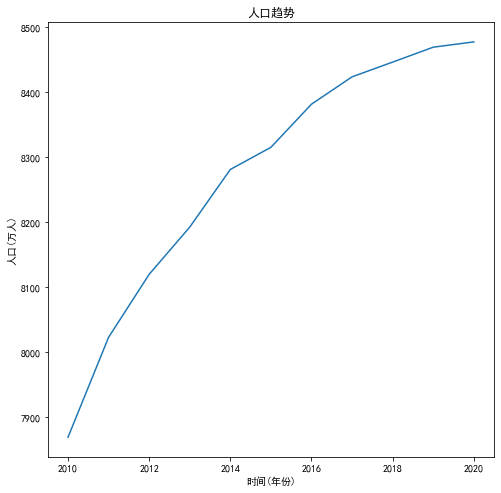

In [25]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.plot(data_population.index, data_population["value"])
ax.set_xlabel('时间(年份)')
ax.set_ylabel('人口(万人)')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.set_title("人口趋势")

### GDP

In [26]:
data_gdp = dataset[dataset["主题"]=="生产总值"]
data_gdp

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,生产总值,GDP,总量,亿元,-,41383.870000
2010,生产总值,第一产业,农林消费部门,亿元,-,2409.240000
2010,生产总值,第二产业,总量,亿元,-,21853.600000
2010,生产总值,第二产业,能源供应部门,亿元,-,904.645913
2010,生产总值,第二产业,工业消费部门,亿元,-,20948.954087
...,...,...,...,...,...,...
2020,生产总值,第二产业,能源供应部门,亿元,-,1660.679968
2020,生产总值,第二产业,工业消费部门,亿元,-,36522.545605
2020,生产总值,第三产业,总量,亿元,-,46583.177251


In [27]:
gdp = data_gdp.groupby(["项目","子项"],sort=False)

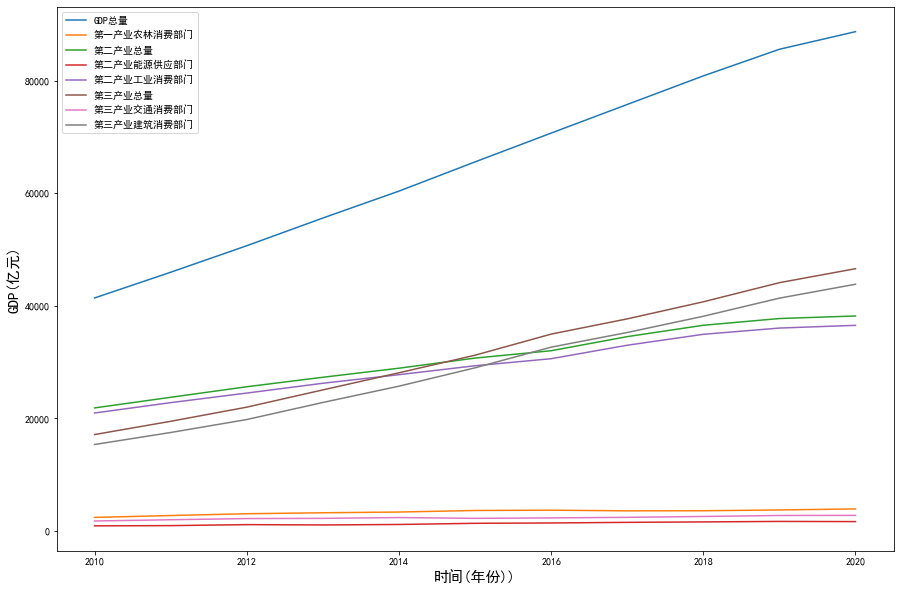

In [28]:
fig, ax = plt.subplots(figsize = (15, 10))
for desc, group in gdp:
    ax.plot(group.index, group.value, label="".join(list(desc)))
    ax.set_xlabel('时间(年份))')
    ax.set_ylabel('GDP(亿元)')
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.legend(fontsize = 10)

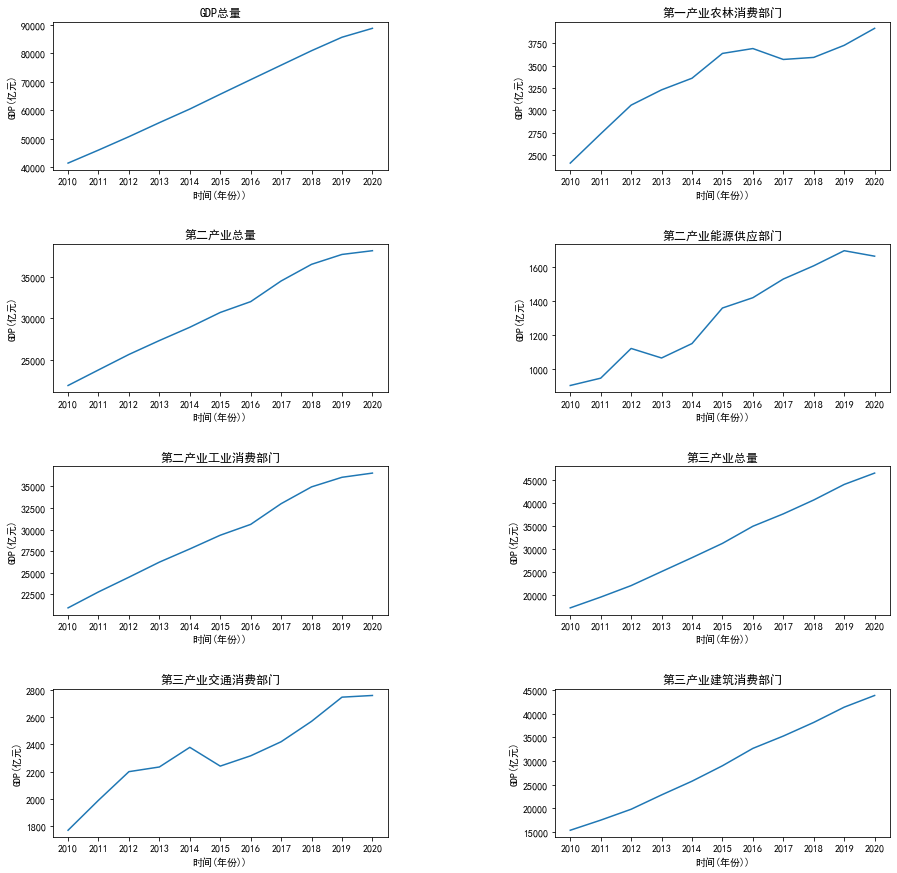

In [29]:
fig, axes = plt.subplots(4,2, figsize = (15, 15))
for (desc, group), ax in zip(gdp, axes.flatten()):
    ax.plot(group.index, group["value"])
    ax.set_xlabel('时间(年份))')
    ax.set_ylabel('GDP(亿元)')
    ax.set_xticks(list(range(2010,2021)))
    ax.set_title("".join(list(desc)))
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(wspace=0.5,hspace=0.5)

### 能源消费量

In [30]:
# 不包含能源供应部门
data_energy_consumption = dataset[dataset["主题"]=="能源消费量"]
data_energy_consumption_1 = data_energy_consumption.loc[data_energy_consumption["子项"]!="能源供应部门"]
data_energy_consumption_1.head(20)

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源消费量,能源消费量,总量,万tce,-,23539.314431
2010,能源消费量,第一产业,农林消费部门,万tce,-,345.355807
2010,能源消费量,第二产业,总量,万tce,-,20113.072184
2010,能源消费量,第二产业,工业消费部门,万tce,-,14312.679203
2010,能源消费量,第三产业,总量,万tce,-,1932.840815
2010,能源消费量,第三产业,交通消费部门,万tce,-,1398.261978
2010,能源消费量,第三产业,建筑消费部门,万tce,-,534.578837
2010,能源消费量,居民生活,居民生活消费,万tce,-,1148.045626
2011,能源消费量,能源消费量,总量,万tce,-,26860.025812


In [31]:
# 能源供应部门
data_energy_consumption_2 = data_energy_consumption.loc[(data_energy_consumption["项目"]=="第二产业")&
                                                          (data_energy_consumption["子项"]=="能源供应部门")]
data_energy_consumption_3 = data_energy_consumption_2.groupby(["细分项"], sort=False)

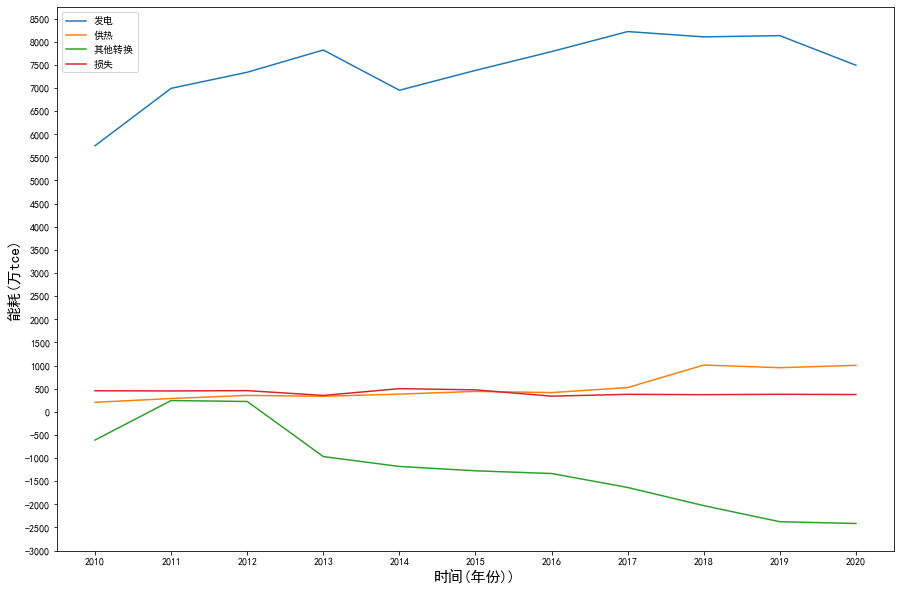

In [32]:
fig, ax = plt.subplots(figsize = (15, 10))
for desc, group in data_energy_consumption_3:
    ax.plot(group.index, group.value, label=desc)
    ax.set_xlabel('时间(年份))')
    ax.set_ylabel('能耗(万tce)')
    ax.set_xticks(list(range(2010,2021)))
    ax.set_yticks(range(-3000,9000, 500))
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.legend(fontsize = 10)

In [33]:
# 计算能源部门总能耗
data_energy_consumption_2["value"]= data_energy_consumption_2.groupby(["date"])["value"].transform(sum)
data_energy_consumption_2.drop_duplicates(subset="value",inplace=True)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
data_energy_consumption = pd.concat([data_energy_consumption_1, data_energy_consumption_2], axis=0)
data_energy_consumption

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源消费量,能源消费量,总量,万tce,-,23539.314431
2010,能源消费量,第一产业,农林消费部门,万tce,-,345.355807
2010,能源消费量,第二产业,总量,万tce,-,20113.072184
2010,能源消费量,第二产业,工业消费部门,万tce,-,14312.679203
2010,能源消费量,第三产业,总量,万tce,-,1932.840815
...,...,...,...,...,...,...
2016,能源消费量,第二产业,能源供应部门,万tce,发电,7205.122123
2017,能源消费量,第二产业,能源供应部门,万tce,发电,7485.235678
2018,能源消费量,第二产业,能源供应部门,万tce,发电,7456.996497


In [35]:
energy_consumption = data_energy_consumption.groupby(["项目","子项"], sort=False)

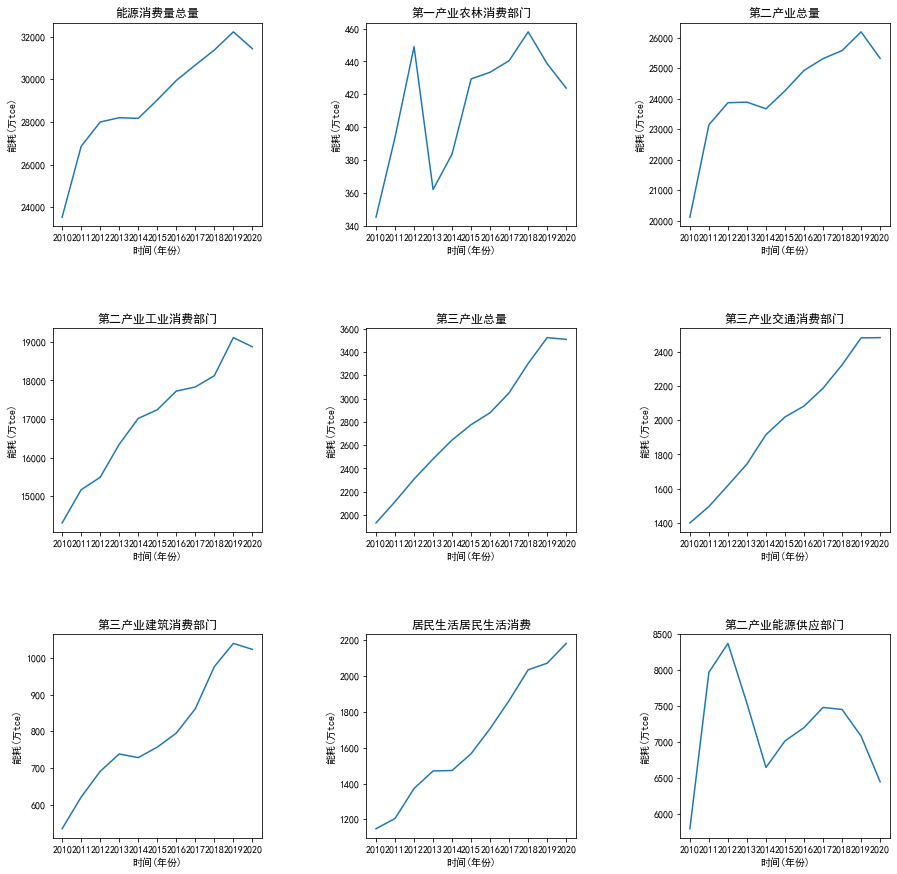

In [36]:
fig, axes = plt.subplots(3,3, figsize = (15, 15))
for (desc, group), ax in zip(energy_consumption, axes.flatten()):
    ax.plot(group.index, group["value"])
    ax.set_xlabel('时间(年份)')
    ax.set_ylabel('能耗(万tce)')
    ax.set_xticks(list(range(2010,2021)))
    ax.set_title("".join(list(desc)))
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(wspace=0.5,hspace=0.5)

### 产业能耗结构

In [37]:
data_industrial_energy_consumption_structure = dataset[dataset["主题"]=="产业能耗结构"]
data_industrial_energy_consumption_structure

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,产业能耗结构,第一产业,农林消费部门,万tce,煤炭,36.186438
2010,产业能耗结构,第一产业,农林消费部门,万tce,油品,274.314933
2010,产业能耗结构,第一产业,农林消费部门,万tce,天然气,0.000000
2010,产业能耗结构,第一产业,农林消费部门,万tce,热力,0.000000
2010,产业能耗结构,第一产业,农林消费部门,万tce,电力,34.854437
...,...,...,...,...,...,...
2020,产业能耗结构,居民生活,居民生活消费,万tce,油品,735.805287
2020,产业能耗结构,居民生活,居民生活消费,万tce,天然气,455.126000
2020,产业能耗结构,居民生活,居民生活消费,万tce,热力,9.300095


In [38]:
industrial_energy_consumption_structure = data_industrial_energy_consumption_structure.groupby(["项目","子项"],sort=False)

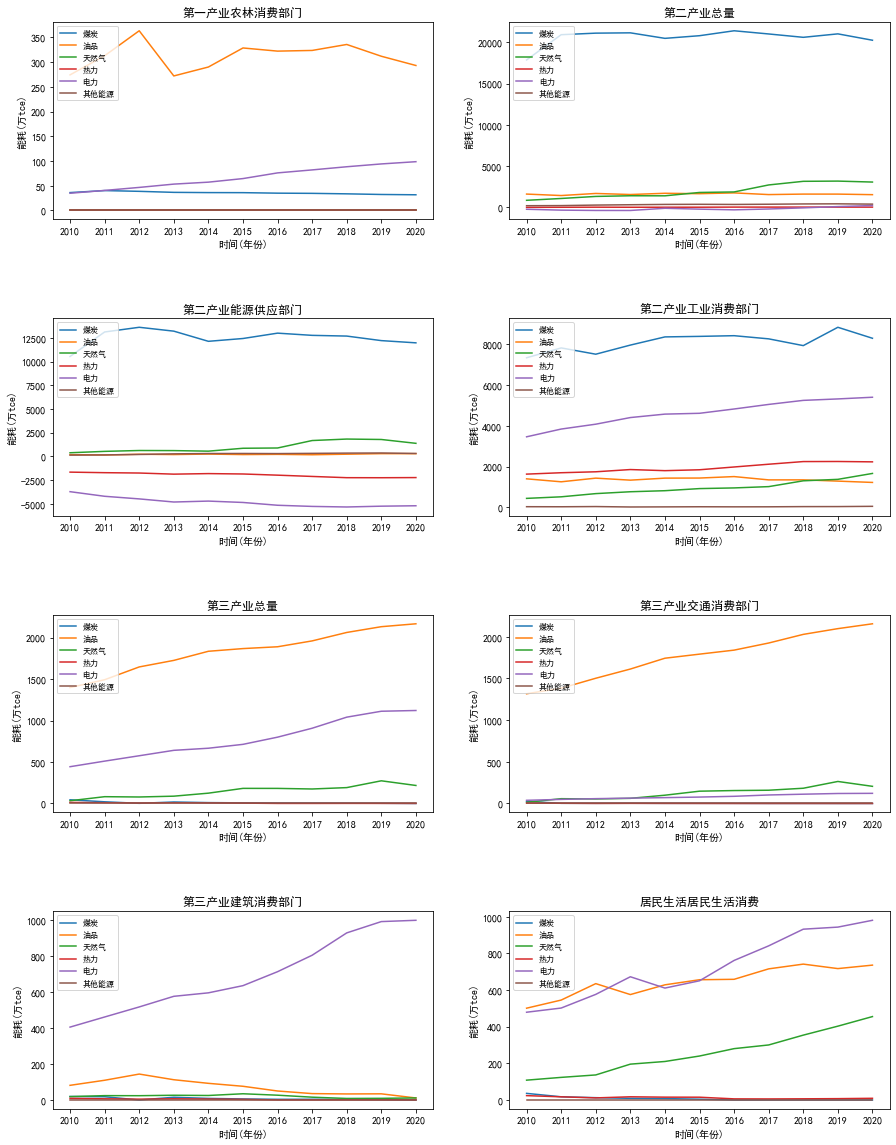

In [39]:
fig, axes = plt.subplots(4,2, figsize = (15, 20))
for (desc1, group), ax in zip(industrial_energy_consumption_structure, axes.flatten()):
    group = group.groupby(["细分项"], sort=False)
    ax.set_title("".join(list(desc1)))
    for desc2, group in  group:
        ax.plot(group.index, group["value"], label=desc2)
        ax.set_xlabel('时间(年份)')
        ax.set_ylabel('能耗(万tce)')
        ax.set_xticks(list(range(2010,2021)))
        #ax.set_yscale("log")
        ax.legend(loc=2, fontsize = 8)
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(hspace=0.5)

### 能耗品种结构

In [40]:
data_consumption_variety_structure = dataset[dataset["主题"]=="能耗品种结构"]
data_consumption_variety_structure

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能耗品种结构,煤炭消费量,总量,万tce,-,17982.693770
2010,能耗品种结构,煤炭消费量,子项,万tce,发电,9335.692325
2010,能耗品种结构,煤炭消费量,子项,万tce,供热,1840.964667
2010,能耗品种结构,煤炭消费量,子项,万tce,其他加工转换,-646.467107
2010,能耗品种结构,煤炭消费量,子项,万tce,损失,0.000000
...,...,...,...,...,...,...
2020,能耗品种结构,天然气消费量,子项,万tce,其他消费,2338.890364
2020,能耗品种结构,新能源热力,总量,万tce,-,0.000000
2020,能耗品种结构,新能源电力,总量,万tce,-,963.068886


In [41]:
# 总量
data_consumption_variety_structure_sum = data_consumption_variety_structure[data_consumption_variety_structure["子项"]=="总量"]

data_consumption_variety_structure_group = data_consumption_variety_structure_sum.groupby(["项目","子项"], sort=False)

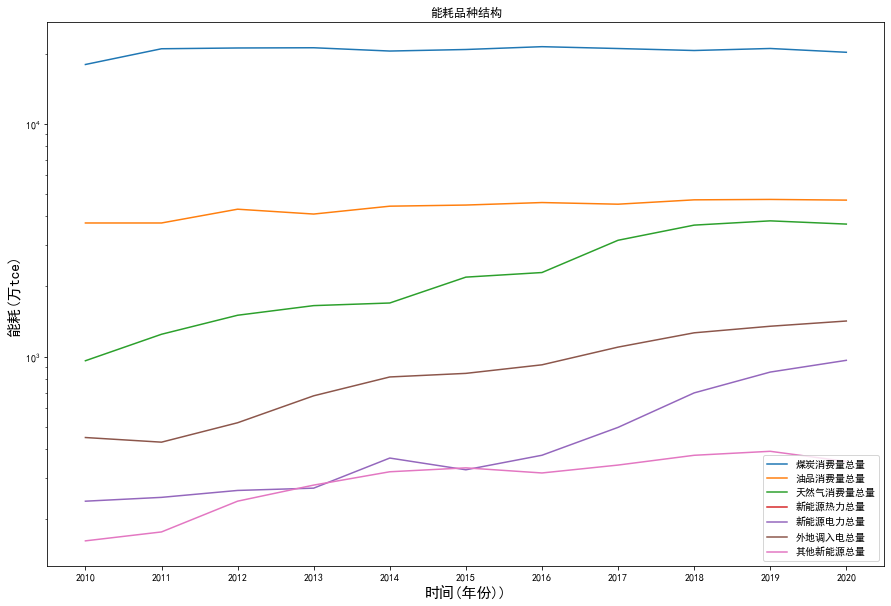

In [42]:
fig, ax = plt.subplots(figsize = (15, 10))
for desc, group in data_consumption_variety_structure_group:
    ax.plot(group.index, group.value, label="".join(list(desc)))
    ax.set_xlabel('时间(年份))')
    ax.set_ylabel('能耗(万tce)')
    ax.set_xticks(list(range(2010,2021)))
    ax.set_title("能耗品种结构")
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.legend(fontsize = 10)
    # 取对数轴
    ax.set_yscale('log')

In [43]:
# 细分项
data_consumption_variety_structure_dt = data_consumption_variety_structure[data_consumption_variety_structure["子项"]!="总量"]
data_consumption_variety_structure_dt = data_consumption_variety_structure_dt.groupby(["项目","子项"], sort=False)

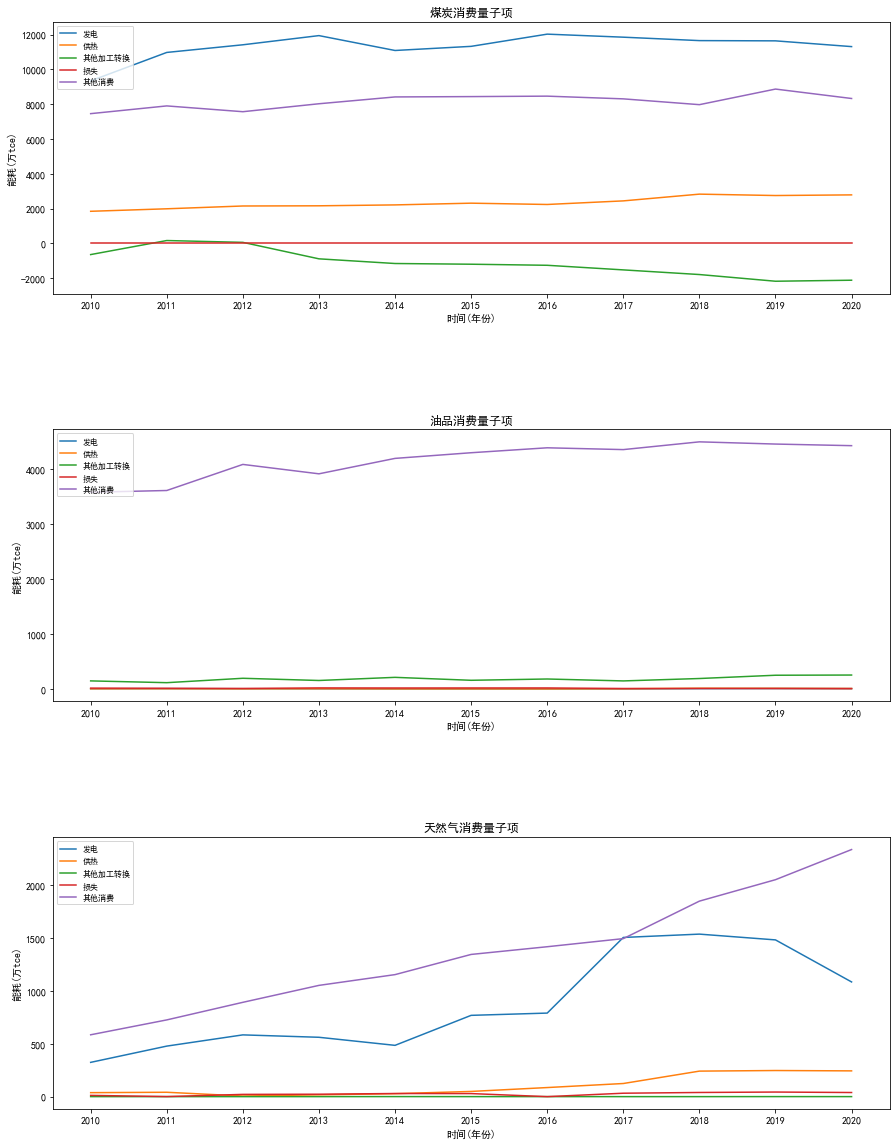

In [44]:
fig, axes = plt.subplots(3,1, figsize = (15, 20))
for (desc1, group), ax in zip(data_consumption_variety_structure_dt, axes.flatten()):
    group = group.groupby(["细分项"], sort=False)
    ax.set_title("".join(list(desc1)))
    for desc2, group in  group:
        ax.plot(group.index, group["value"], label=desc2)
        ax.set_xlabel('时间(年份)')
        ax.set_ylabel('能耗(万tce)')
        ax.set_xticks(list(range(2010,2021)))
        #ax.set_yscale("log")
        ax.legend(loc=2, fontsize = 8)
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(hspace=0.5)

## 碳排放

In [45]:
df2 = pd.read_excel(r"G:\碳排放.xlsx", sheet_name=1, header=0)
df2

,主题,项目,子项,单位,细分项,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,碳排放量,碳排放量,总量,万tCO2,-,56360.1,65193.3,67502.6,66749.4,64853.3,66074.8,68526.1,70451.6,71502,74096.3,72633.3
1,NaN,第一产业,农林消费部门,万tCO2,-,896.07,1031.18,1165.28,1007.48,1020.85,1162.51,1211.03,1245.02,1295.49,1278.38,1238.76
2,NaN,第二产业,工业消费部门,万tCO2,-,45225.7,52975.8,54048.3,52229.1,51188,51101.9,52382.2,52975.8,52506.9,54235.4,52954
3,NaN,第三产业,总量,万tCO2,-,5898.28,6584.56,7147.77,7791.47,7676.08,8314.53,8801.02,9524.01,10422.1,11151,10906
4,NaN,NaN,交通消费部门,NaN,-,3068.03,3280.29,3561.73,3847.16,4157.35,4398.07,4556.29,4826.11,5125.17,5449.65,5456.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,天然气,0,0,0,0,0,0,0,0,0,0,0
58,NaN,NaN,NaN,NaN,热力,3.07157,3.03122,3.15695,3.11836,3.31235,3.39855,3.30892,3.39987,3.91862,3.82669,3.87284
59,NaN,NaN,NaN,NaN,电力,5.86908,5.99523,5.86377,6.02801,5.22714,5.55367,5.51481,5.4902,5.43013,5.47946,5.24632
60,NaN,NaN,NaN,NaN,其他能源,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df2.fillna(method="ffill", axis=0, inplace=True)

In [47]:
features = df2.iloc[:,:5].copy().values
features.shape

(62, 5)

In [48]:
data = df2.iloc[:,5:].copy().values

new_data = []
for i in range(11):
    tmp = np.concatenate([features,np.array([[str(i+2010)] for _ in range(62)]),data[:,i].reshape(62,1)], axis=1)
    new_data.append(tmp)
new_data = np.concatenate(new_data, axis=0)
new_data

array([['碳排放量', '碳排放量', '总量', ..., '-', '2010', 56360.0518416869],
       ['碳排放量', '第一产业', '农林消费部门', ..., '-', '2010', 896.069697449971],
       ['碳排放量', '第二产业', '工业消费部门', ..., '-', '2010', 45225.6967955493],
       ...,
       ['能源供应部门碳排放因子', '损失', '-', ..., '电力', '2020', 5.24631836733803],
       ['能源供应部门碳排放因子', '损失', '-', ..., '其他能源', '2020', 0],
       ['外地调入电力碳排放因子', '-', '-', ..., '-', '2020', 3.8364328045623]],
      dtype=object)

In [49]:
dataset = pd.DataFrame(new_data, columns=["主题","项目","子项","单位","细分项","date","value"])
dataset["date"] = pd.to_datetime(dataset["date"]).dt.year
dataset.set_index("date", inplace=True)
dataset

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,碳排放量,碳排放量,总量,万tCO2,-,56360.1
2010,碳排放量,第一产业,农林消费部门,万tCO2,-,896.07
2010,碳排放量,第二产业,工业消费部门,万tCO2,-,45225.7
2010,碳排放量,第三产业,总量,万tCO2,-,5898.28
2010,碳排放量,第三产业,交通消费部门,万tCO2,-,3068.03
...,...,...,...,...,...,...
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,天然气,0
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,热力,3.87284
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,电力,5.24632


In [50]:
dataset.info

<bound method DataFrame.info of                主题    项目      子项        单位   细分项    value
date                                                    
2010         碳排放量  碳排放量      总量     万tCO2     -  56360.1
2010         碳排放量  第一产业  农林消费部门     万tCO2     -   896.07
2010         碳排放量  第二产业  工业消费部门     万tCO2     -  45225.7
2010         碳排放量  第三产业      总量     万tCO2     -  5898.28
2010         碳排放量  第三产业  交通消费部门     万tCO2     -  3068.03
...           ...   ...     ...       ...   ...      ...
2020  能源供应部门碳排放因子    损失       -  tCO2/tce   天然气        0
2020  能源供应部门碳排放因子    损失       -  tCO2/tce    热力  3.87284
2020  能源供应部门碳排放因子    损失       -  tCO2/tce    电力  5.24632
2020  能源供应部门碳排放因子    损失       -  tCO2/tce  其他能源        0
2020  外地调入电力碳排放因子     -       -  tCO2/tce     -  3.83643

[682 rows x 6 columns]>

In [51]:
dataset["value"] = pd.to_numeric(dataset["value"], errors='coerce')
dataset.info

<bound method DataFrame.info of                主题    项目      子项        单位   细分项         value
date                                                         
2010         碳排放量  碳排放量      总量     万tCO2     -  56360.051842
2010         碳排放量  第一产业  农林消费部门     万tCO2     -    896.069697
2010         碳排放量  第二产业  工业消费部门     万tCO2     -  45225.696796
2010         碳排放量  第三产业      总量     万tCO2     -   5898.284185
2010         碳排放量  第三产业  交通消费部门     万tCO2     -   3068.030574
...           ...   ...     ...       ...   ...           ...
2020  能源供应部门碳排放因子    损失       -  tCO2/tce   天然气      0.000000
2020  能源供应部门碳排放因子    损失       -  tCO2/tce    热力      3.872840
2020  能源供应部门碳排放因子    损失       -  tCO2/tce    电力      5.246318
2020  能源供应部门碳排放因子    损失       -  tCO2/tce  其他能源      0.000000
2020  外地调入电力碳排放因子     -       -  tCO2/tce     -      3.836433

[682 rows x 6 columns]>

### 碳排放量

In [52]:
df2_carbon_emission = dataset[dataset["主题"]=="碳排放量"]
df2_carbon_emission

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,碳排放量,碳排放量,总量,万tCO2,-,56360.051842
2010,碳排放量,第一产业,农林消费部门,万tCO2,-,896.069697
2010,碳排放量,第二产业,工业消费部门,万tCO2,-,45225.696796
2010,碳排放量,第三产业,总量,万tCO2,-,5898.284185
2010,碳排放量,第三产业,交通消费部门,万tCO2,-,3068.030574
...,...,...,...,...,...,...
2020,碳排放量,第二产业,工业消费部门,万tCO2,-,52954.048905
2020,碳排放量,第三产业,总量,万tCO2,-,10906.027504
2020,碳排放量,第三产业,交通消费部门,万tCO2,-,5456.836404


In [53]:
carbon_emission = df2_carbon_emission.groupby(["项目","子项"],sort=False)
carbon_emission.head()

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,碳排放量,碳排放量,总量,万tCO2,-,56360.051842
2010,碳排放量,第一产业,农林消费部门,万tCO2,-,896.069697
2010,碳排放量,第二产业,工业消费部门,万tCO2,-,45225.696796
2010,碳排放量,第三产业,总量,万tCO2,-,5898.284185
2010,碳排放量,第三产业,交通消费部门,万tCO2,-,3068.030574
2010,碳排放量,第三产业,建筑消费部门,万tCO2,-,2830.253612
2010,碳排放量,居民生活,居民生活消费,万tCO2,-,4340.001163
2011,碳排放量,碳排放量,总量,万tCO2,-,65193.342227
2011,碳排放量,第一产业,农林消费部门,万tCO2,-,1031.176452


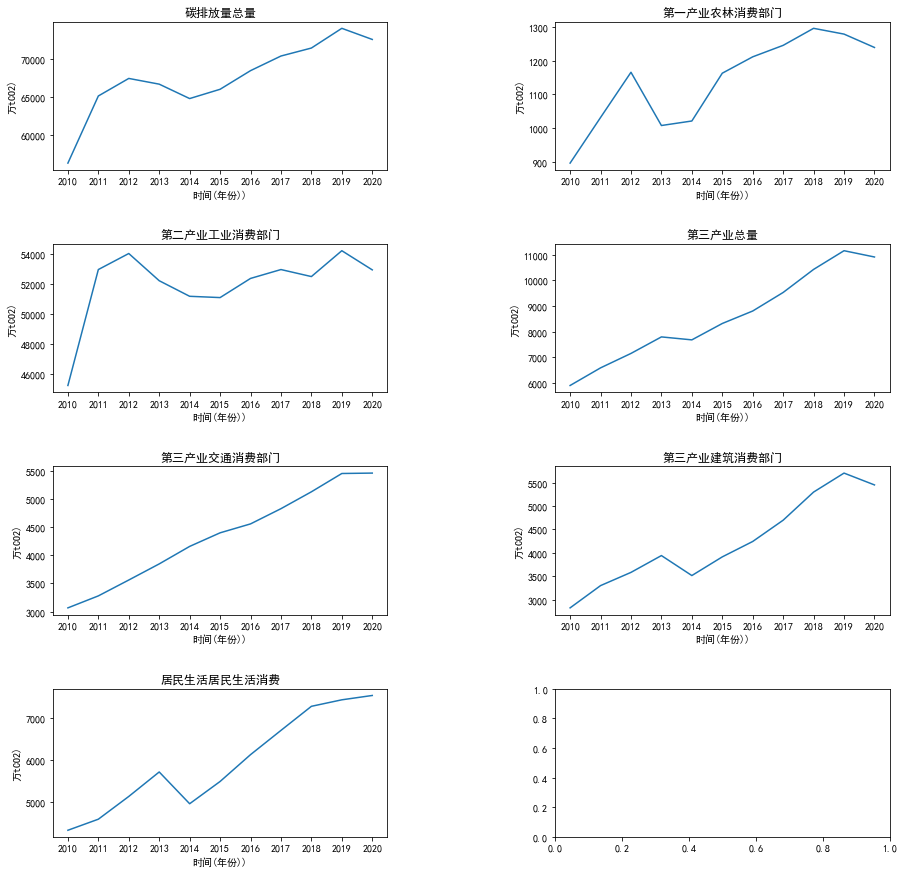

In [54]:
fig, axes = plt.subplots(4,2, figsize = (15, 15))
for (desc, group), ax in zip(carbon_emission, axes.flatten()):
    ax.plot(group.index, group["value"])
    ax.set_xlabel('时间(年份))')
    ax.set_ylabel('万tCO2)')
    ax.set_xticks(list(range(2010,2021)))
    ax.set_title("".join(list(desc)))
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(wspace=0.5,hspace=0.5)

### 能源消费部门碳排放因子

In [55]:
df2_consumption_factor = dataset[dataset["主题"]=="能源消费部门碳排放因子"]
df2_consumption_factor

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源消费部门碳排放因子,第一产业,农林消费部门,tCO2/tce,煤炭,2.663673
2010,能源消费部门碳排放因子,第一产业,农林消费部门,tCO2/tce,油品,2.113812
2010,能源消费部门碳排放因子,第一产业,农林消费部门,tCO2/tce,天然气,NaN
2010,能源消费部门碳排放因子,第一产业,农林消费部门,tCO2/tce,热力,NaN
2010,能源消费部门碳排放因子,第一产业,农林消费部门,tCO2/tce,电力,6.307109
...,...,...,...,...,...,...
2020,能源消费部门碳排放因子,居民生活,居民生活消费,tCO2/tce,油品,1.982979
2020,能源消费部门碳排放因子,居民生活,居民生活消费,tCO2/tce,天然气,1.627710
2020,能源消费部门碳排放因子,居民生活,居民生活消费,tCO2/tce,热力,3.705001


In [56]:
df2_consumption_factor_nan = df2_consumption_factor.loc[(df2_consumption_factor["主题"]=="能源消费部门碳排放因子")&(
                                                df2_consumption_factor["项目"]=="第三产业") &(
                                                df2_consumption_factor["子项"]=="建筑消费部门") &(
                                                df2_consumption_factor["细分项"]=="煤炭")]
df2_consumption_factor_nan

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2011,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2012,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,NaN
2013,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.652512
2014,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2015,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.622658
2016,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2017,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2018,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673


In [57]:
# 插值法填补
df2_consumption_factor_nan['value'].interpolate(method='linear', inplace = True)
df2_consumption_factor_nan

F:\anaconda3\lib\site-packages\pandas\core\generic.py:7023: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2011,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2012,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.658093
2013,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.652512
2014,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2015,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.622658
2016,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2017,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673
2018,能源消费部门碳排放因子,第三产业,建筑消费部门,tCO2/tce,煤炭,2.663673


In [58]:
# 替代原本的值
df2_consumption_factor.loc[(df2_consumption_factor["主题"]=="能源消费部门碳排放因子")&(
                                                df2_consumption_factor["项目"]=="第三产业") &(
                                                df2_consumption_factor["子项"]=="建筑消费部门") &(
                                                df2_consumption_factor["细分项"]=="煤炭")] = df2_consumption_factor_nan

F:\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [59]:
#把NaN值填充为0
df2_consumption_factor.fillna(0,inplace=True)

F:\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [60]:
consumption_factor = df2_consumption_factor.groupby(["项目","子项"],sort=False)

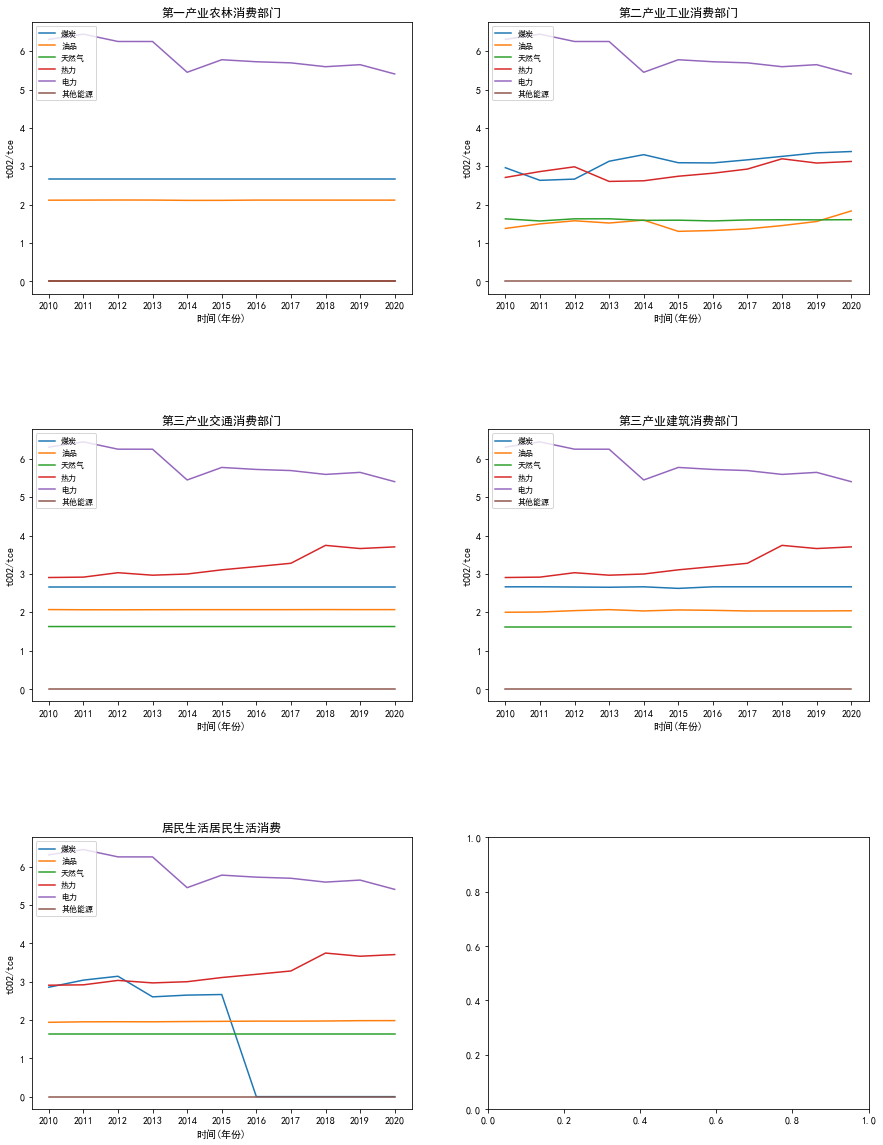

In [61]:
fig, axes = plt.subplots(3,2, figsize = (15, 20))
for (desc1, group), ax in zip(consumption_factor, axes.flatten()):
    group = group.groupby(["细分项"], sort=False)
    ax.set_title("".join(list(desc1)))
    for desc2, group in  group:
        ax.plot(group.index, group["value"], label=desc2)
        ax.set_xlabel('时间(年份)')
        ax.set_ylabel('tCO2/tce')
        ax.set_xticks(list(range(2010,2021)))
        #ax.set_yscale("log")
        ax.legend(loc=2, fontsize = 8)
    
# 调整子图之间的水平和垂直间距
plt.subplots_adjust(hspace=0.5)

### 能源供应部门碳排放因子

In [62]:
df2_supply_factor = dataset[dataset["主题"]=="能源供应部门碳排放因子"]
df2_supply_factor

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,煤炭,2.730412
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,油品,2.110946
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,天然气,1.627710
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.906112
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,电力,NaN
...,...,...,...,...,...,...
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,油品,0.000000
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,天然气,0.000000
2020,能源供应部门碳排放因子,损失,-,tCO2/tce,热力,3.872840


In [63]:
df2_supply_factor_nan = df2_supply_factor.loc[(df2_supply_factor["主题"]=="能源供应部门碳排放因子")&(
                                                df2_supply_factor["项目"]=="发电") &(
                                                df2_supply_factor["细分项"]=="热力")]
df2_supply_factor_nan

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.906112
2011,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.916319
2012,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,NaN
2013,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.966588
2014,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.997623
2015,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.106586
2016,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.190421
2017,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.277680
2018,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.744935


In [64]:
# 插值法填补
df2_supply_factor_nan['value'].interpolate(method='linear', inplace = True)
df2_supply_factor_nan

F:\anaconda3\lib\site-packages\pandas\core\generic.py:7023: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.906112
2011,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.916319
2012,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.941453
2013,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.966588
2014,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,2.997623
2015,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.106586
2016,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.190421
2017,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.277680
2018,能源供应部门碳排放因子,发电,-,tCO2/tce,热力,3.744935


In [65]:
# 替代原本的值
df2_supply_factor.loc[(df2_supply_factor["主题"]=="能源供应部门碳排放因子")&(
                                                df2_supply_factor["项目"]=="发电") &(
                                                df2_supply_factor["细分项"]=="热力")] = df2_supply_factor_nan

F:\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
#把NaN值填充为0
df2_supply_factor.fillna(0,inplace=True)

F:\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [67]:
supply_factor = df2_supply_factor.groupby(["项目"],sort=False)

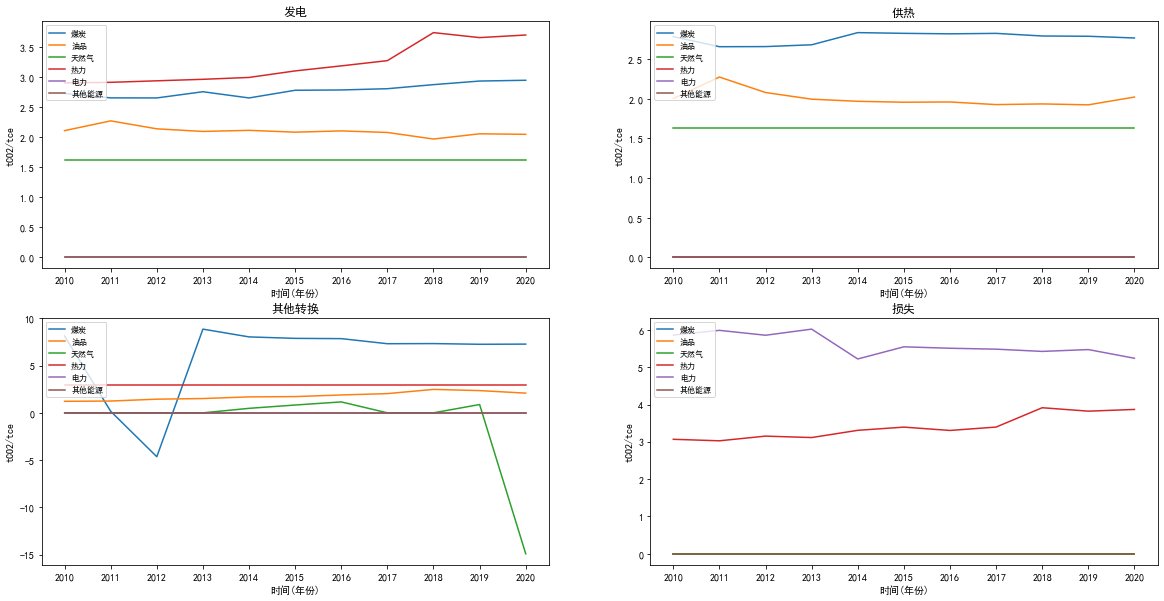

In [68]:
fig, axes = plt.subplots(2,2, figsize = (20,10))
for (desc1, group), ax in zip(supply_factor, axes.flatten()):
    group = group.groupby(["细分项"], sort=False)
    ax.set_title("".join(list(desc1)))
    for desc2, group in  group:
        ax.plot(group.index, group["value"], label=desc2)
        ax.set_xlabel('时间(年份)')
        ax.set_ylabel('tCO2/tce')
        ax.set_xticks(list(range(2010,2021)))
        #ax.set_yscale("log")
        ax.legend(loc=2, fontsize = 8)
    
# 调整子图之间的水平和垂直间距
# plt.subplots_adjust(hspace=0.5)

### 外地调入电力碳排放因子

In [69]:
outer_electricity_factor = dataset[dataset["主题"]=="外地调入电力碳排放因子"]
outer_electricity_factor

,主题,项目,子项,单位,细分项,value
date,,,,,,
2010,外地调入电力碳排放因子,-,-,tCO2/tce,-,4.507622
2011,外地调入电力碳排放因子,-,-,tCO2/tce,-,4.458542
2012,外地调入电力碳排放因子,-,-,tCO2/tce,-,4.032498
2013,外地调入电力碳排放因子,-,-,tCO2/tce,-,3.542341
2014,外地调入电力碳排放因子,-,-,tCO2/tce,-,2.557182
2015,外地调入电力碳排放因子,-,-,tCO2/tce,-,2.566427
2016,外地调入电力碳排放因子,-,-,tCO2/tce,-,2.420542
2017,外地调入电力碳排放因子,-,-,tCO2/tce,-,3.068800
2018,外地调入电力碳排放因子,-,-,tCO2/tce,-,3.531283


Text(0.5, 1.0, '外地调入电力碳排放因子')

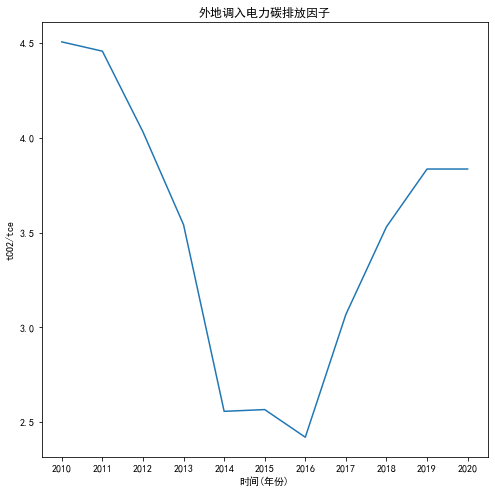

In [70]:
fig, ax = plt.subplots(1, figsize = (8,8))
ax.plot(outer_electricity_factor.index, outer_electricity_factor["value"])
ax.set_xlabel('时间(年份)')
ax.set_ylabel('tCO2/tce')

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.set_xticks(list(range(2010,2021)))
ax.set_title("外地调入电力碳排放因子")